## Risk Managment Analysis

This code is used in the context of risk managment.
First idea explored is that of a loss function. Loss is the decrease of the value of a portfolio over time and can be understood as negative
profit. We can get Losses of a portfolio for time $t$ as the negative difference between the portfolio Value at time $t$ and at previous time
$t-1$. Mathematically, we can write this as $L_{t} = -( V_{t} - V_{t-1})$. The concept of risk factor change is simply that there are 
variables which affect the value of the portfolio and those can be seen as a factor of risk. Consider simplest case risk factor is log of stock prices and risk factor change, which is the difference in risk factors, can be thought of as log returns of a stock.
The loss function is defines as 
$$L_{t} = 
\sum_{i=1}^{d} a_{i}*S_{i}*(e^{X_{i}}-1).
$$$a_{i}$ - shares of stock $i$.

$S_{i}$ - Stock price of stock $i$.

$X_{i}$ - risk factor change of stock $i$.

We have $d$ stocks in this portfolio.


In [1]:
def portfolio_losses(prices, shares):
    import numpy as np
    prices, shares = np.array(prices), np.array(shares) # Turn to numpy to make calculations easy
    prices = prices[~np.isnan(prices).any(axis=1)] 
    risk_factor = np.log(prices) # Define risk factor changes
    if risk_factor.ndim >= 2:  # Is portfolio with many stocks
        risk_factor_changes = np.diff(risk_factor, axis=0) 
    else: # Portfolios has only one stock
        risk_factor_changes = np.diff(risk_factor)
    
    if prices.ndim >=2:
        prices = prices[1:,]
    else:
        prices = prices[1:]
    n = risk_factor_changes.shape[0]
    losses = -np.sum(shares*prices*(np.exp(risk_factor_changes)-1), axis=1)
    return losses

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import yfinance as yf

stocks = ["AAPL", "TSLA", "MSFT", "GOOGL"]

stock_data = yf.download(stocks, start="2010-01-01", end="2024-12-21")[["Adj Close"]]

stock_prices = stock_data.values

[*********************100%***********************]  4 of 4 completed


In [4]:
losses = portfolio_losses(stock_prices, [1, 1, 1, 1])

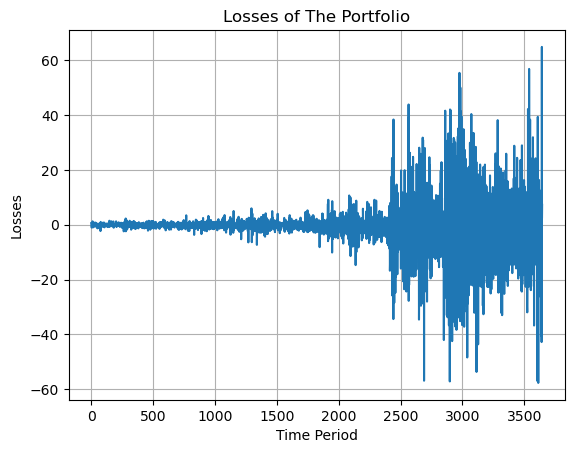

In [5]:
plt.plot(losses)
plt.grid()
plt.title("Losses of The Portfolio")
plt.xlabel("Time Period")
plt.ylabel("Losses");

Let us turn our attention to Value-at-Risk (VaR). VaR measures how much the loss of a given portfolio is, given a certain level of rareness. So 
to get VaR we would have to set a level, say 5%, and then we have to rank the losses we have available and pick a loss which is achieved or exceeded 5% percent of the cases.

In [6]:
# Rank losses
losses_ranked = np.sort(losses)

# Pick a level e.g. 5% 0.05
alpha = 0.05

# Get the value which occur at least than often
N = losses.shape[0]
boundary = int(np.ceil((1-alpha)*N))
VaR = losses_ranked[boundary]
VaR

12.67626467477583

In [7]:
def VaR(data, alpha):
    N = data.shape[0]
    data_ranked = np.sort(data)
    boundary = int(np.ceil((1-alpha)*N))
    VaR = data_ranked[boundary]
    return VaR

We can use VaR from the last 252 trading days so compute VaR for last year

In [8]:
VaR90 = np.zeros(N-252)
VaR95 = np.zeros(N-252)
VaR99 = np.zeros(N-252)
for i in range(N-252):
    VaR90[i] = VaR(losses[i:i+252], 0.1)
    VaR95[i] = VaR(losses[i:i+252], 0.05)
    VaR99[i] = VaR(losses[i:i+252], 0.01)

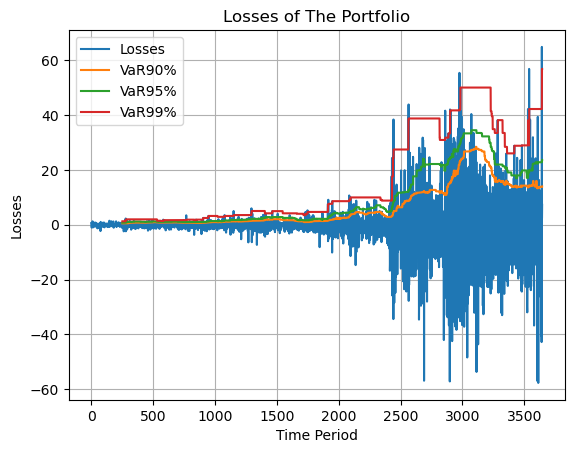

In [9]:
plt.plot(losses, label="Losses")
plt.plot(np.arange(252, N), VaR90, label="VaR90%")
plt.plot(np.arange(252, N), VaR95, label="VaR95%")
plt.plot(np.arange(252, N), VaR99, label="VaR99%")
plt.grid()
plt.title("Losses of The Portfolio")
plt.xlabel("Time Period")
plt.ylabel("Losses")
plt.legend();

Expected Shortfall is the idea that we do not just want the boundary associated with these losses, but we want the expected value once this value is exceeded.

In [10]:
def expected_shortfall(data, alpha):
    N = data.shape[0]
    data_ranked = np.sort(data)
    boundary = int(np.ceil((1-alpha)*N))
    ES = np.mean(data_ranked[boundary:])
    return ES

In [11]:
ES90 = np.zeros(N-252)
ES95 = np.zeros(N-252)
ES99 = np.zeros(N-252)
for i in range(N-252):
    ES90[i] = expected_shortfall(losses[i:i+252], 0.1)
    ES95[i] = expected_shortfall(losses[i:i+252], 0.05)
    ES99[i] = expected_shortfall(losses[i:i+252], 0.01)

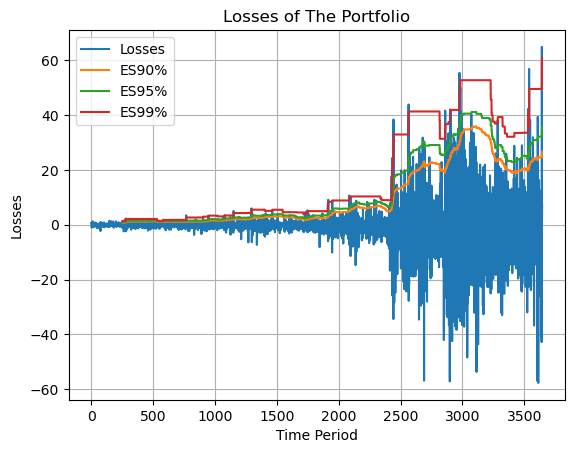

In [12]:
plt.plot(losses, label="Losses")
plt.plot(np.arange(252, N), ES90, label="ES90%")
plt.plot(np.arange(252, N), ES95, label="ES95%")
plt.plot(np.arange(252, N), ES99, label="ES99%")
plt.grid()
plt.title("Losses of The Portfolio")
plt.xlabel("Time Period")
plt.ylabel("Losses")
plt.legend();

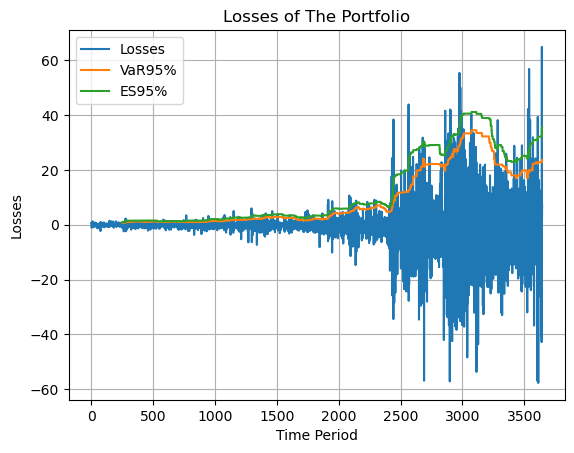

In [13]:
plt.plot(losses, label="Losses")
plt.plot(np.arange(252, N), VaR95, label="VaR95%")
plt.plot(np.arange(252, N), ES95, label="ES95%")
plt.grid()
plt.title("Losses of The Portfolio")
plt.xlabel("Time Period")
plt.ylabel("Losses")
plt.legend();

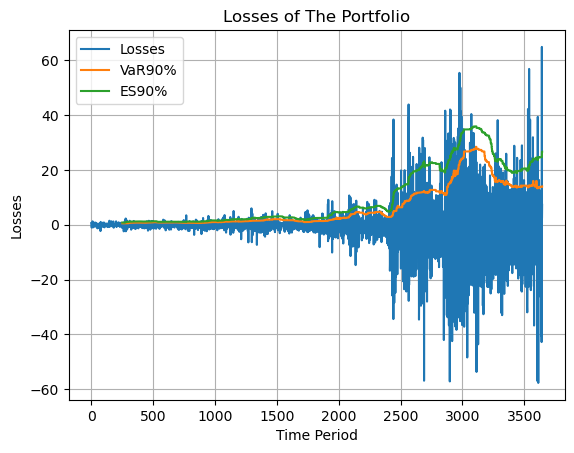

In [14]:
plt.plot(losses, label="Losses")
plt.plot(np.arange(252, N), VaR90, label="VaR90%")
plt.plot(np.arange(252, N), ES90, label="ES90%")
plt.grid()
plt.title("Losses of The Portfolio")
plt.xlabel("Time Period")
plt.ylabel("Losses")
plt.legend();

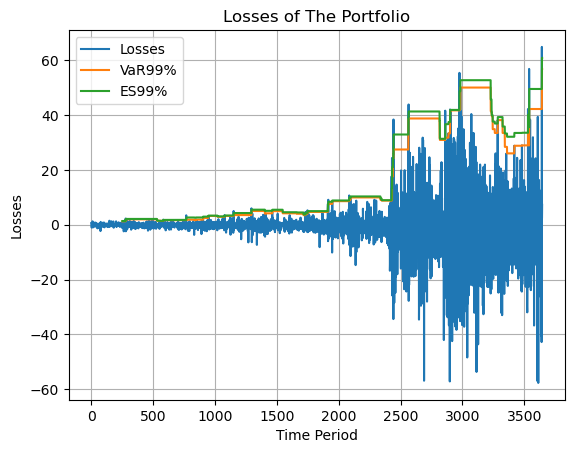

In [15]:
plt.plot(losses, label="Losses")
plt.plot(np.arange(252, N), VaR99, label="VaR99%")
plt.plot(np.arange(252, N), ES99, label="ES99%")
plt.grid()
plt.title("Losses of The Portfolio")
plt.xlabel("Time Period")
plt.ylabel("Losses")
plt.legend();